# Project: TMDB Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
> According to the dataset, We generate several questions:
* Which year has the highest release of movies?
* Which Movie Has The Highest Or Lowest Profit? Top 10 movies which earn highest profit?
* Movie with Highest And Lowest Budget?
* Which movie made the highest revenue and lowest as well?
* Movie with shorest and longest runtime?
* Which movie get the highest or lowest votes (Ratings).
* Which Year Has The Highest Profit Rate?
* Which length movies most liked by the audiences according to their popularity?
* Average Runtime Of Movies From Year To Year?
* Which genres are most popular from year to year? 
* What kinds of properties are associated with movies that have high revenues?

> From the dataset, I have choosen to figure out the following 2 questions:
>
> 1. Which genres are most popular from year to year? 
>
> 2. What kinds of properties are associated with movies that have high revenues?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
# see the column info and null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#### 1. Removing the duplicate data

In [7]:
# Check if there is duplicate data 
df.duplicated().sum()

1

In [8]:
# Delete the duplicate rows
df.drop_duplicates(inplace = True)

In [9]:
# Confirm the duplicate data has been deleted
df.duplicated().any()

False

#### 2. Droping some columns that are useless

In [10]:
df.drop(columns = ['imdb_id','homepage','cast','overview','production_companies','tagline','keywords'],inplace=True)

In [11]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 3. Droping null values columns which has small portion in dataset

In [12]:
# Find the null values columns
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [13]:
# Drop null values with director and genres
cal = ['director','genres']
df.dropna(axis=0,how='any',subset=cal,inplace=True)

In [14]:
# Check if null values are dropped
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

#### 3. Changing the data type

In [15]:
# Observe the data type in the dataset
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [16]:
# Change the budget_adj and revenue_adj data type into int
change_type = ['budget_adj','revenue_adj']
df[change_type] = df[change_type].astype(int)
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj          int64
revenue_adj         int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Which genres are most popular from year to year? 

For this question, I choose to use popularity score to determine the most popular genres. I didn't use vote_average because the total vote for each movie is different. On analyzing the popular movies from 1960, following steps can be made:


* Seperating the genres colunm. We notice in genres columns, it contains multiple values separated by pipe (|) characters.
* Calculate the average popularity score by each genres in every single year.
* Extracting the max average popularity score in each year and find out the genres type.
* Creating the bar plot to observe which genres is the most popular one.

In [17]:
df_name=df['genres'].str.split('|',expand=True).stack().reset_index(level=1,drop=True)
df_name

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
1              Adventure
1        Science Fiction
1               Thriller
2              Adventure
2        Science Fiction
2               Thriller
3                 Action
3              Adventure
3        Science Fiction
3                Fantasy
4                 Action
4                  Crime
4               Thriller
5                Western
5                  Drama
5              Adventure
5               Thriller
6        Science Fiction
6                 Action
6               Thriller
6              Adventure
7                  Drama
7              Adventure
7        Science Fiction
8                 Family
              ...       
10853              Drama
10853            Romance
10854           Thriller
10854              Drama
10854              Crime
10855             Comedy
10855             Family
10855            Mystery
10855            Romance


In [18]:
df_name.name = 'genres1'
df_new = df.drop(['genres'],axis=1).join(df_name)
df_new.head(10)

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,137999939,1392445892,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,137999939,1392445892,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,137999939,1392445892,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,137999939,1392445892,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,137999939,348161292,Action
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,137999939,348161292,Adventure
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,137999939,348161292,Science Fiction
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,137999939,348161292,Thriller
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,101199955,271619025,Adventure
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,101199955,271619025,Science Fiction


In [19]:
df_new = df_new.groupby(['release_year','genres1']).popularity.mean()
df_new

release_year  genres1        
1960          Action             0.590724
              Adventure          0.700981
              Comedy             0.396000
              Crime              0.346480
              Drama              0.566305
              Family             0.278064
              Fantasy            0.428247
              Foreign            0.194948
              History            0.412364
              Horror             0.591450
              Music              0.423531
              Romance            0.541227
              Science Fiction    0.327905
              Thriller           0.811910
              War                0.225863
              Western            0.567759
1961          Action             0.365913
              Adventure          0.767323
              Animation          2.631987
              Comedy             0.679838
              Crime              0.806519
              Drama              0.432233
              Family             0.755722
    

In [20]:
df_genres = df_new.unstack()
df_genres.head()

genres1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,NaN,0.396000,0.346480,NaN,0.566305,0.278064,0.428247,0.194948,0.412364,0.591450,0.423531,NaN,0.541227,0.327905,NaN,0.811910,0.225863,0.567759
1961,0.365913,0.767323,2.631987,0.679838,0.806519,NaN,0.432233,0.755722,0.154073,0.113651,0.334463,0.254578,0.564749,0.712793,0.426036,0.274103,NaN,NaN,0.531184,0.210021
1962,0.708945,0.942513,NaN,0.273183,0.472816,NaN,0.392000,0.323463,0.235542,0.235542,0.600060,0.179368,0.323933,0.259220,0.365621,0.179212,NaN,0.760582,0.506162,0.414180
1963,0.951729,0.728487,2.180410,0.444481,0.552367,NaN,0.322448,0.852632,0.214071,0.351647,0.481618,0.376901,NaN,0.421033,0.399573,0.467836,NaN,0.719929,0.664326,0.246957
1964,0.813087,0.736431,0.445746,0.491229,0.261690,NaN,0.364818,0.878298,0.599791,0.152209,0.316377,0.189650,0.753799,0.308091,0.221586,0.226636,NaN,0.622580,0.930959,0.127679


In [21]:
# Filter the max value of popularity in each year
value = df_genres.max(axis = 1)
value.head()

release_year
1960    0.811910
1961    2.631987
1962    0.942513
1963    2.180410
1964    0.930959
dtype: float64

In [22]:
# Convert value into dataset
value = pd.DataFrame(value, columns = ['average_popularity'])
value.head()

,average_popularity
release_year,
1960,0.811910
1961,2.631987
1962,0.942513
1963,2.180410
1964,0.930959


In [23]:
# Create another column for genre which has max average popularity
genre = df_genres.idxmax(axis = 1)
genre = pd.DataFrame(genre,columns = ['genre'])
genre.head()

,genre
release_year,
1960,Thriller
1961,Animation
1962,Adventure
1963,Animation
1964,War


In [24]:
# Combine two columns
merge = pd.merge(genre, value, left_index = True, right_index = True)
merge.head()

,genre,average_popularity
release_year,,
1960,Thriller,0.811910
1961,Animation,2.631987
1962,Adventure,0.942513
1963,Animation,2.180410
1964,War,0.930959


In [25]:
count = merge.groupby(['genre']).count().sort_values(by=['average_popularity'],ascending=False)
count

,average_popularity
genre,
Adventure,14
Animation,11
Fantasy,8
Crime,5
Family,3
War,3
Action,2
Music,2
Mystery,2


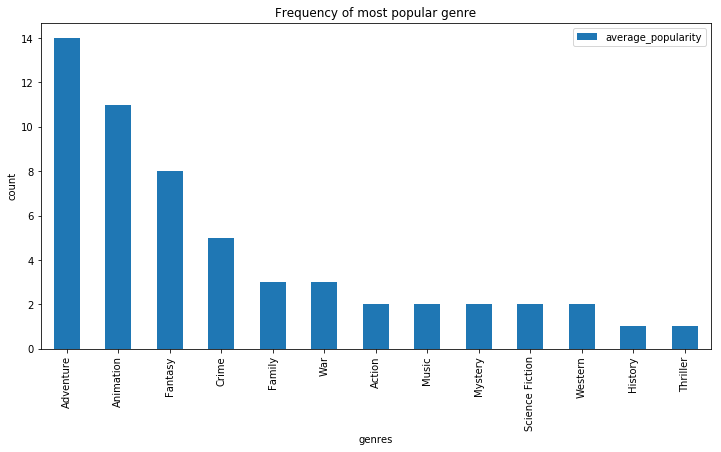

In [26]:
# Create a bar chart
count.plot(kind='bar',figsize=(12,6));
plt.title('Frequency of most popular genre')
plt.xlabel('genres')
plt.ylabel('count');

#### Result: We can see clearly that over all years, the adventure is the most popular genres. 
>* From the plot, we can see the adventure genres is counted 14 times with the max average popularity score during 1960-2015.
>* Animation is also popular because the frequency is over 10 times.
>* The action, music, mystery, science fiction, western, history and thriller generes are below 2 times which means they are also not likely to be the most popular genres in the future.

### Research Question 2  What kinds of properties are associated with movies that have high revenues?

According to real life experience, we assume that popularity, budget, vote_average and runtime might associate with movies that have high revenues. 

* Using sns.regplot() function to draw the scatter and regression line.
* Extracting that four properties from original dataset and finding the pairwise correlation of factors.
* Creating a correlation matrix plot


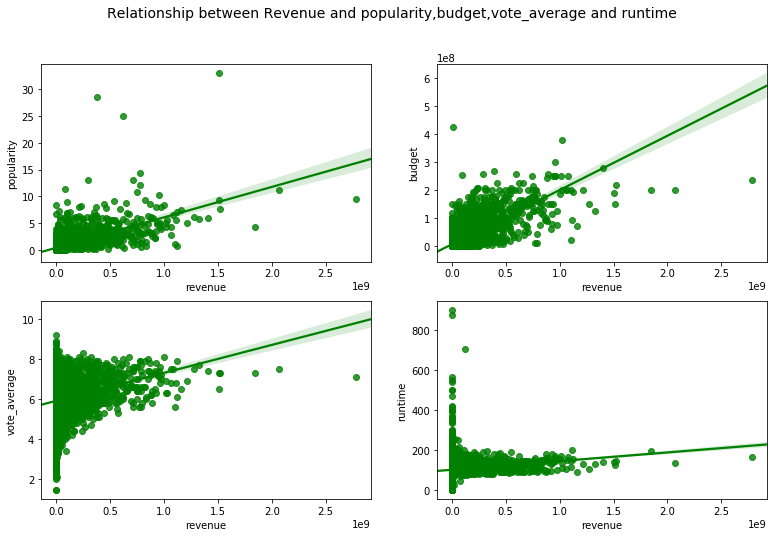

In [27]:
fig,axes = plt.subplots(2,2,figsize = (13,8))
fig.suptitle(('Relationship between Revenue and popularity,budget,vote_average and runtime'),fontsize=14)
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]

sns.regplot(x='revenue',y='popularity',data=df,color='g',ax=ax1)
sns.regplot(x='revenue',y='budget',data=df,color='g',ax=ax2)
sns.regplot(x='revenue',y='vote_average',data=df,color='g',ax=ax3)
sns.regplot(x='revenue',y='runtime',data=df,color='g',ax=ax4)

plt.show()

**Breif result:**

>From the plots, popularity,budget,vote_average and runtime have positive correlation with revenue. But it is difficult to >recognize which factor has the strong relationship. So we continue to find out by using corr() function.
>

In [28]:
df2 = df[['revenue','popularity','budget','vote_average','runtime']]
corr = df2.corr()
corr

,revenue,popularity,budget,vote_average,runtime
revenue,1.000000,0.663095,0.734713,0.175030,0.165231
popularity,0.663095,1.000000,0.544866,0.213046,0.140526
budget,0.734713,0.544866,1.000000,0.083637,0.193901
vote_average,0.175030,0.213046,0.083637,1.000000,0.165142
runtime,0.165231,0.140526,0.193901,0.165142,1.000000


Text(0.5,1,'Correlation between features')

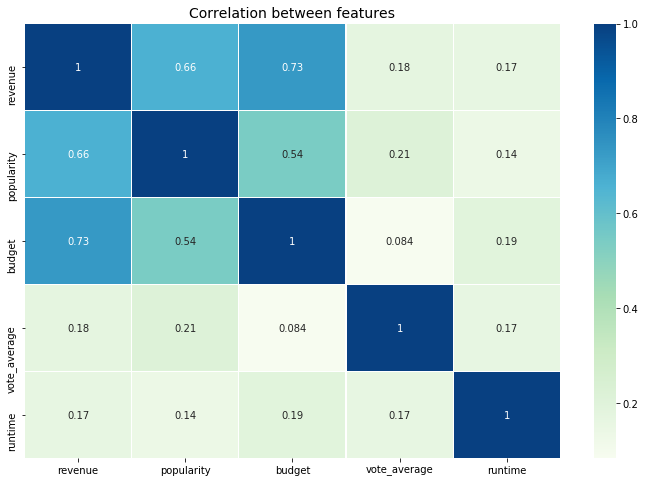

In [29]:
f, ax= plt.subplots(figsize = (12, 8))
sns.heatmap(corr,cmap='GnBu', linewidths = 0.05,annot=True)
plt.title('Correlation between features',fontsize=14)


**Breif result:**

>* From scatter plot, we find that popularity,budget,vote_average and runtime have positive relationship with revenue.
>* Budget and popularity have a stronger positive liner correlation. 
>* The correlation between revenue and budget is 0.73 which means we can assume if we invest a larger budget, the revenue has more posibility to increase.
>* The correlation between revenue and polularity is 0.66 which means if the movie become more popular, the revenue seems to be increasing.


<a id='conclusions'></a>
## Conclusions

1. Based on analysis, the adventure is the most popular genres. 

2. Popularity and budget are more associated with movies that have high revenues.

## **Limitations:**

The result have certain limitations:

1. For the first question, some movies have several genres and we separate them. However, those genres for one movie correspond to the same popularity score. If we only analyse the movie with individual score, the result would be more accurate.

2. For the second question, there are some zero value in revenue and budget columns we haven't dropped might influence the result. 

3. We only use porpularity factor as the standard for popular movie. The voting score can also be a consideration to test if a movie is popular or not.

4. For the movies that have high revenue, I assume popularity,budget,vote_average and runtime as potential influence factor based on my life experience. There might be other properties also associated with high revenue that I didn't include.

5.  There is no evidence to see the budget and revenue column use the same currency unit. So it is possible that different movies have budget in different currency according to different production company.

6. When I did the data cleaning process, splitting the '|' in the cell into rows is a challenge for me.


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0